## Team project dataset: Student performance dataset

### Import necessary libraries and load data sets to pandas DataFrame.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [7]:
# Load data for subject "Math".
math = pd.read_csv('student/student-mat.csv', sep=";")
print(math.shape)  # (395, 33)
# add an extra column ['subject] to math DataFrame.
math.insert(1, 'subject', ['math'] * 395)

(395, 33)


In [8]:
# Load data for subject "Portuguese".
portuguese = pd.read_csv('student/student-por.csv', sep=";")
print(portuguese.shape)  # (649, 33)
# add an extra column ['subject] to portuguese dataframe.
portuguese.insert(1, 'subject', ['por'] * 649)

(649, 33)


In [9]:
# Concatenate both DataFrame vertically
students = pd.concat([math, portuguese])
# Check and make sure the concatenation is correct
assert math.shape[0] + portuguese.shape[0] == students.shape[0], 'merge error'
assert math.shape[1] == portuguese.shape[1] == students.shape[1], 'merge error'

### Check the DataFrame

In [10]:
students.shape

(1044, 34)

In [11]:
students.head() # column 'subject' has been inserted. 

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,math,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,GP,math,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,GP,math,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,GP,math,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,GP,math,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
students.info() # No data missing, but some columns data type are object (text), data cleansing needed before ML. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null object
subject       1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-nul

In [14]:
# Sort out the all the column names with data type object 
text_columns = []
dataTypeDict = dict(students.dtypes)
for col in dataTypeDict: 
    if dataTypeDict[col] == 'O': 
        text_columns.append(col)
text_columns

['school',
 'subject',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [15]:
# convert all the two-answers categorical features to integers: (Mjob, Fjob, reason, guardian, needs one-hot-encoding method to convert into numerical data)
students['school'] = students['school'].map({'GP':0, "MS":1})
students['subject'] = students['subject'].map({'math':0, "por":1})
students['sex'] = students['sex'].map({'F':0, "M":1})
students['address'] = students['address'].map({'U':0, "R":1})
students['famsize'] = students['famsize'].map({'GT3':0, "LE3":1})
students['Pstatus'] = students['Pstatus'].map({'A':0, "T":1})
students['schoolsup'] = students['schoolsup'].map({'no':0, "yes":1})
students['famsup'] = students['famsup'].map({'no':0, "yes":1})
students['paid'] = students['paid'].map({'no':0, "yes":1})
students['activities'] = students['activities'].map({'no':0, "yes":1})
students['nursery'] = students['nursery'].map({'no':0, "yes":1})
students['higher'] = students['higher'].map({'no':0, "yes":1})
students['internet'] = students['internet'].map({'no':0, "yes":1})
students['romantic'] = students['romantic'].map({'no':0, "yes":1})
# Recheck the dtypes
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null int64
subject       1044 non-null int64
sex           1044 non-null int64
age           1044 non-null int64
address       1044 non-null int64
famsize       1044 non-null int64
Pstatus       1044 non-null int64
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null int64
famsup        1044 non-null int64
paid          1044 non-null int64
activities    1044 non-null int64
nursery       1044 non-null int64
higher        1044 non-null int64
internet      1044 non-null int64
romantic      1044 non-null int64
famrel        1044 non-null int64
freetime      1044 non-null int64
goout 

### Data visualization 

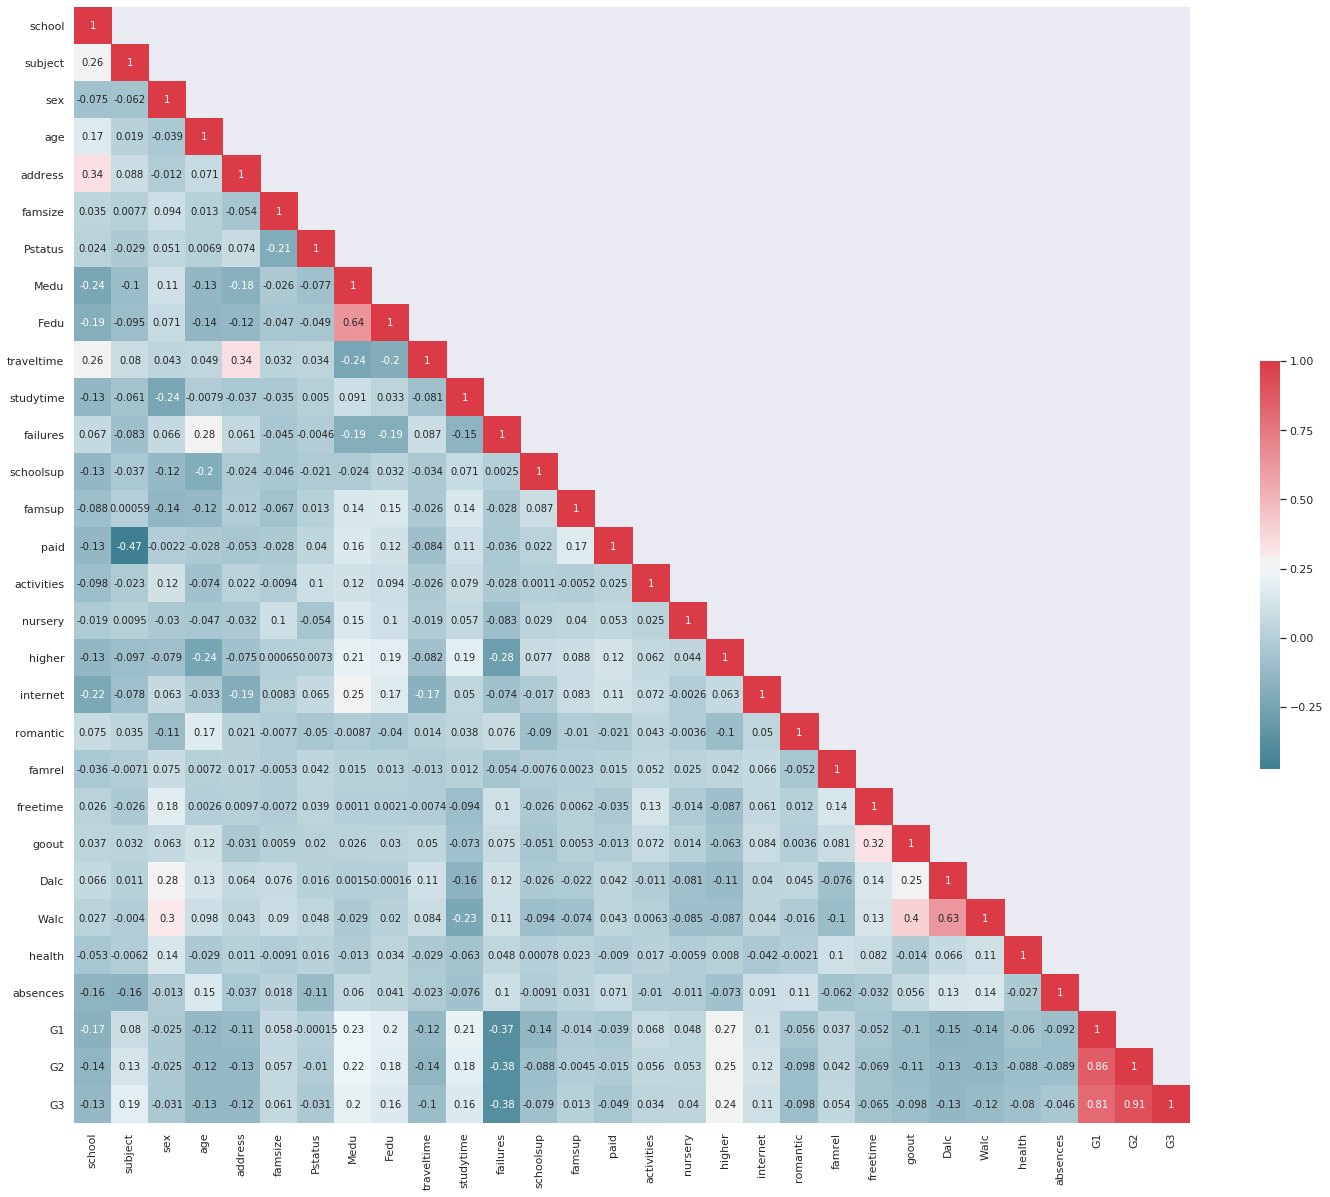

In [191]:
# Plotting the heatmap (missing Mjob, Fjob, reason, guardian)
fig, ax = plt.subplots(figsize=(25, 25))                  

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map

# Numpy’s tril() function to extract Lower Triangle Matrix
df_lt = students.corr().where(np.tril(np.ones(students.corr().shape)).astype(np.bool))

# plotting the heatmap 
sns.heatmap(data      = df_lt, 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .3}, 
            annot     = True, 
            annot_kws = {'fontsize': 10},
            ax        = ax
           )
plt.show()

### Interesting findings of Heatmap: 
1. G1 and G2 and failures are the most 3 related features to final grade G3. 
2. Mother's education is very much related with father's education. 
3. Beside the G1 and G2 and failures, we can see the other TopN influence factors to target G3 are: higher:0.24, Medu:0.2, Fedu:0.16, studytime:0.16, age:-0.13, Dalc:-0.13, address:-0.12, Walc: -0.12, internet:0.11
4. walc and goout has high relation. 
5. traveltime and address has high relation. 
6. Internet has a positive relation to target G3. 
7. sex, Pstatus, schoolsup, famsup, paid, nursery, romantic, famrel, health, absences (These factors are surpriseingly showing us the grade is not much related to them, which is contrary to our usual perception: family support, school support or extra classes paid should greatly help to improve grades but not as hoped. However, as we usually worried Early school love, poor health and often absences must affect grades but they do not really lead to a decline in grades. 

`So let's visualize these findings by plotting them :)`

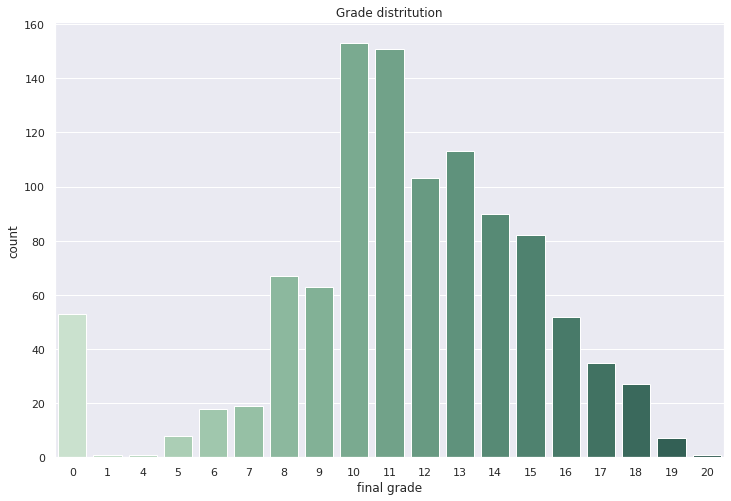

In [221]:
# countplot to review G3 distritution 

plt.figure(figsize=(12, 8))
sns.set()
sns.countplot('G3', data=students, palette=("ch:2.5,-.2,dark=.3"))
plt.title('Grade distritution')
plt.xlabel('final grade')
plt.show()

Above plot shows that the grades of the students conform to the normal distribution. However there are a bit too much the students whose grade is only 0. 

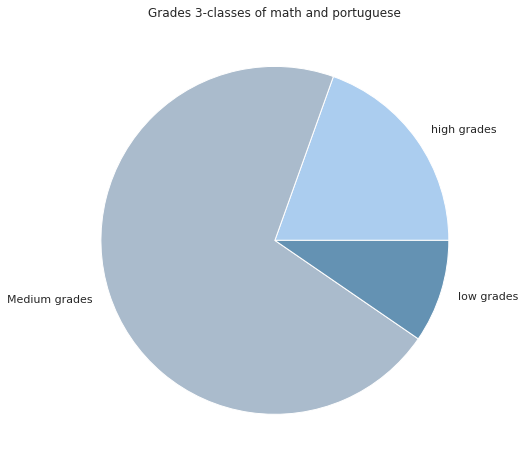

In [207]:
# let's class our grades (high:>=15, mid:8-14, low<=7)
high = students.loc[students['G3'] >= 15].count()[0]
medium = students.loc[(students['G3'] >= 8) & (students['G3'] <=14)].count()[0]
low = students.loc[students['G3'] <= 7].count()[0]

# pieplot
plt.figure(figsize=(12, 8))
labels = ['high grades', 'Medium grades', 'low grades']
colors = ['#abcdef', '#aabbcc', '#6492b3']
plt.pie([high,medium,low], labels=labels, colors=colors)
plt.title('Grades 3-classes of math and portuguese')
plt.show()

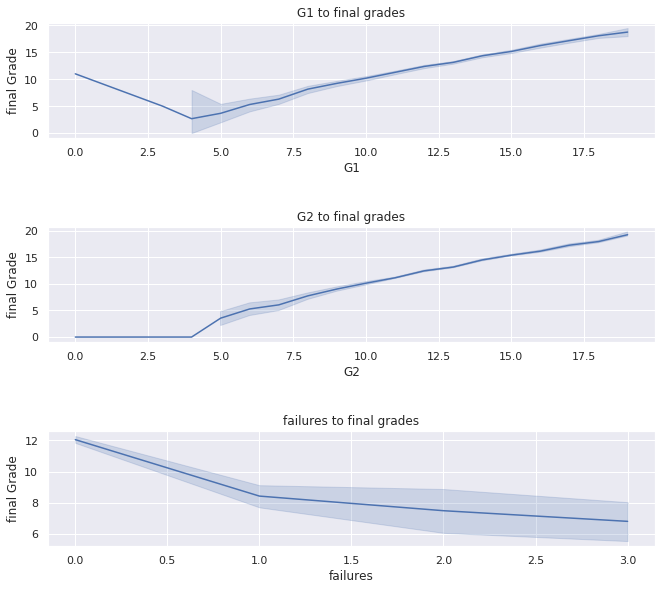

In [208]:
# lineplot on G1/G2/failures to G3 

fig, ax = plt.subplots(3,1,figsize=(10, 9))
sns.set()
index = 0
for col in ['G1', 'G2', 'failures']: 
    sns.lineplot(col, 'G3', data=students, ax=ax[index])
    ax[index].set_title(col + ' to final grades')
    ax[index].set_xlabel(col)
    ax[index].set_ylabel('final Grade')
    index+=1 
fig.tight_layout(pad=3.0)



These 3 plottings demostrate that: Students' academic performance continues to be stable. 
It means students with good results will continue to perform well and vice versa. 

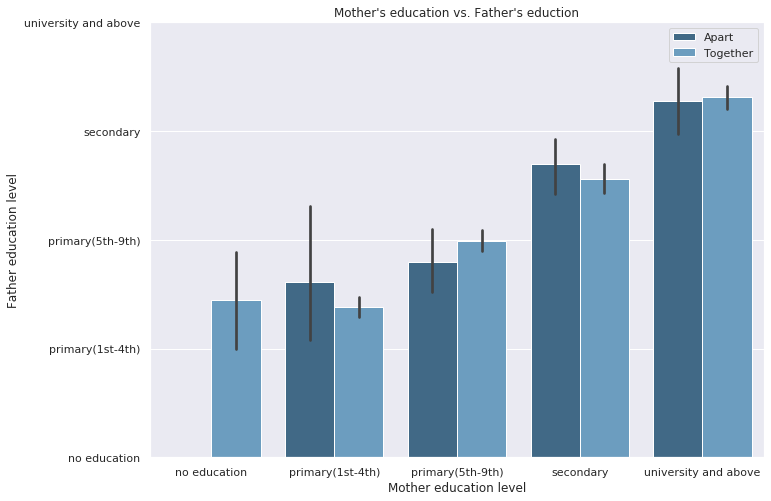

In [209]:
# barplot for Medu and Fedu
new_Pstatus = []
for each_status in students['Pstatus']: 
    if each_status == 0: 
        new_Pstatus.append('Apart')
    else: 
        new_Pstatus.append('Together')
students['NPstatus'] = new_Pstatus
        
plt.figure(figsize=(11, 8))
sns.set()
labels=['Apart', 'Together']
sns.barplot('Medu', 'Fedu', hue='NPstatus', data=students, palette=("Blues_d"))

plt.title("Mother's education vs. Father's eduction")
plt.xlabel('Mother education level')
plt.ylabel('Father education level')
plt.xticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.yticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.legend()
plt.show()

This plot shows that people prefer to marry similar education background person, it might because they have more interests in common. And women has none education, there is no devoice in that group. The other groups, the devoice rate is almost the same 50%. 

Text(0.5, 1.0, 'Studytime on final grade')

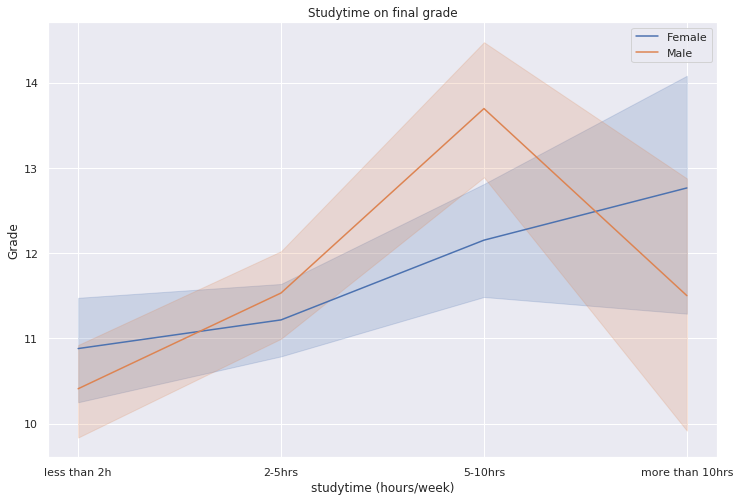

In [219]:
# Lineplot 
sorted_by_studytime_df = students.sort_values('studytime')
plt.figure(figsize=(12, 8))
sns.set()
sns.lineplot('studytime', 'G3', hue='sex', data=sorted_by_studytime_df)
plt.xlabel('studytime (hours/week)')
plt.ylabel('Grade')
plt.xticks([1,2,3,4], ('less than 2h', '2-5hrs', '5-10hrs', 'more than 10hrs'))
plt.legend(labels=['Female', 'Male'])
plt.title('Studytime on final grade')

Studytime means weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

From above plot, it shows that for female students, the more studytime spent, the better the grade is. However for male students, the grade is increasing with the studytime, but when the total weekly studytime is over than 10hs, their grades are declining. 

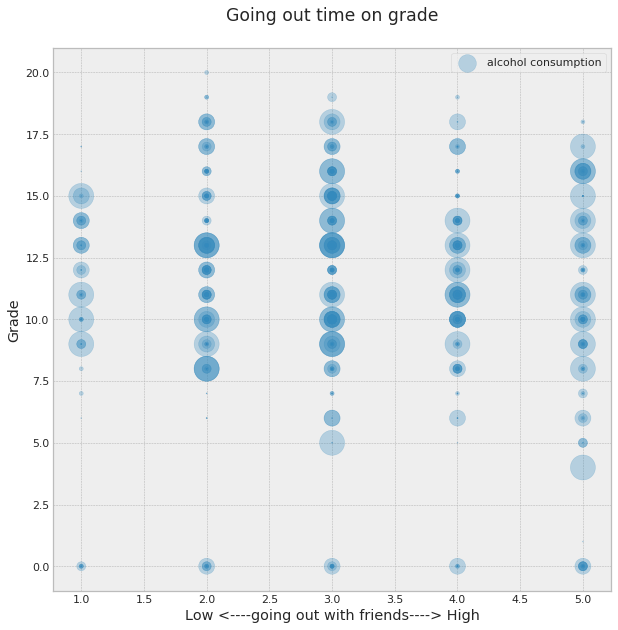

In [265]:
# Scatter plot 
plt.style.use("bmh")
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.scatter(students['goout'], students['G3'], alpha=0.3, s=students[['Walc']+['Dalc']]**4, label='alcohol consumption')

axes.set_xlabel('Low <----going out with friends----> High')
axes.set_ylabel('Grade')
axes.set_title('Going out time on grade\n')
axes.legend()
plt.show()

From this plot we can see that the students who go out rarely has the minimal fluctuations in grades but not the best grade group. The best group is going out on low level but still spend sometime with friends.

And all the groups the top grade students almost no alcohol consumption.

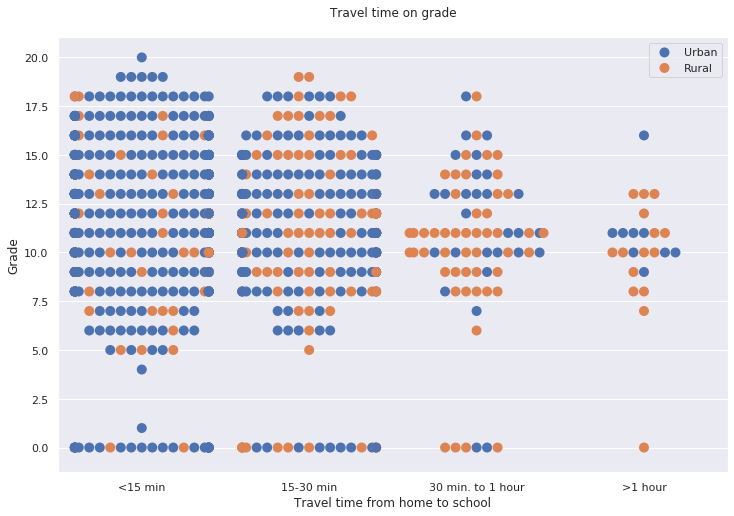

In [272]:
# swarmplot plot 
sns.set()
plt.figure(figsize=(12, 8))
sns.swarmplot('traveltime', 'G3', data=students, hue='address', size=)

plt.xlabel('Travel time from home to school')
plt.ylabel('Grade')
plt.xticks([0,1,2,3], ('<15 min', '15-30 min', '30 min. to 1 hour', '>1 hour'))

plt.title('Travel time on grade\n')
plt.legend(labels=['Urban', 'Rural'])
plt.show()

From this plot we can see that the students who spent more time on the way to school have lower grades. And most of the students live near school and students who live in Rural are normally further than students live in Urban. 

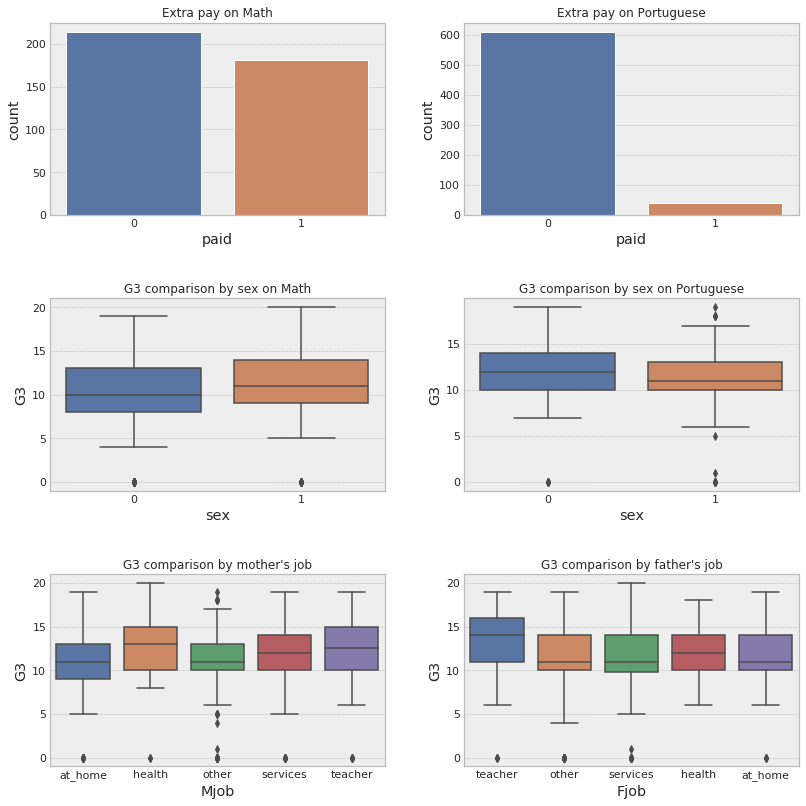

In [248]:
# comparisons

fig, ax = plt.subplots(3,2,figsize=(12, 12))
sns.set()

# first row of subplots 
# plot to check how much the percentage of extra pay on Math) 
sns.countplot('paid', data=students.loc[students['subject']==0], ax=ax[0][0])
ax[0][0].set_title('Extra pay on Math') 
# # plot to check how much the percentage of extra pay on Portuguese) 
sns.countplot('paid', data=students.loc[students['subject']==1], ax=ax[0][1])
ax[0][1].set_title('Extra pay on Portuguese')


# second row of subplots
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==0], ax=ax[1][0])
ax[1][0].set_title('G3 comparison by sex on Math') 
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==1], ax=ax[1][1])
ax[1][1].set_title('G3 comparison by sex on Portuguese') 

# second row of subplots
sns.boxplot('Mjob', 'G3', data=students, ax=ax[2][0])
ax[2][0].set_title("G3 comparison by mother's job") 
sns.boxplot('Fjob', 'G3', data=students, ax=ax[2][1])
ax[2][1].set_title("G3 comparison by father's job") 


fig.tight_layout(pad=3.0)

plt.show()



Above plotttings show: 
1. For extra classes, parents paid more on Math and very little paid on Portuguese. 
2. Male students have higher performance on Math and Female students have higher performance on Portuguese. 
3. Mother's job is health related, their kids have best performance and Father's job is teacher related, their kids has best performance. 

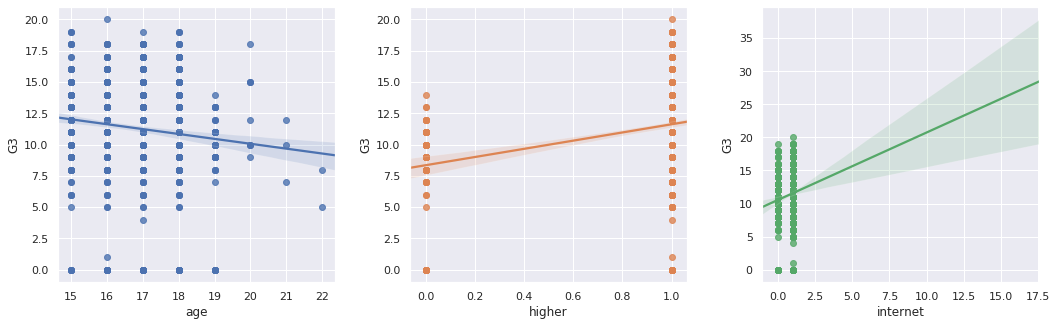

In [228]:
# regplot 

fig, (axis1, axis2, axis3)  = plt.subplots(1, 3,figsize=(15,5))
sns.regplot(x='age', y='G3', data=students, ax=axis1)
sns.regplot(x='higher', y='G3', data=students, ax=axis2)
sns.regplot(x='internet', y='G3', data=students, ax=axis3)
fig.tight_layout(pad=2.0)

Above 3 plots show: 
1. With the age, the grade is decline. 
2. Students who wants to take higher education get the better study performance. 
3. Internet doesn't affect learning, it helps with academic performance. 

### Machine Learning 

In [185]:
pd.get_dummies(students['Mjob'])

,at_home,health,other,services,teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
644,0,0,0,1,0
645,0,0,0,0,1
646,0,0,1,0,0
647,0,0,0,1,0
